In [1]:
import sympy as sym
import math
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

**Ejercicios capitulo 3**

**3.1** Make sure SymPy is installed on your system; use it to analytically differentiate the function $f(x) = e^{sin(2x)}$. Then, evaluate the derivative at a few points from $x = 0 to x = 0.5$. Compare the latter values to the output of fprime() from code 3.1.

In [70]:
x=sym.Symbol("x", real=True)
fx = sym.exp(sym.sin(2*x))
x1=fx.diff(x)
f=sym.lambdify(x,x1)
n=np.linspace(0,5)
y=f(n*0.1)
print(y)

[2.         2.04080771 2.0815628  2.12221008 2.16269158 2.2029465
 2.2429113  2.28251962 2.32170242 2.36038793 2.39850177 2.435967
 2.47270421 2.50863159 2.54366508 2.57771848 2.61070359 2.64253037
 2.6731071  2.7023406  2.7301364  2.75639898 2.78103199 2.80393852
 2.82502133 2.84418318 2.86132708 2.87635659 2.88917619 2.89969155
 2.90780991 2.9134404  2.91649442 2.91688599 2.91453211 2.90935317
 2.90127326 2.89022059 2.87612787 2.85893263 2.83857762 2.81501116
 2.78818747 2.758067   2.7246168  2.68781075 2.6476299  2.60406268
 2.55710523 2.50676153]


In [8]:
from math import exp, sin, cos

def f(x):
       return exp(sin(2*x))
def fprime(x):
    return 2*exp(sin(2*x))*cos(2*x)
def calc_fd(f,x,h):
    fd = (f(x+h) - f(x))/h
    return fd
def calc_cd(f,x,h):
    cd = (f(x+h/2) - f(x-h/2))/h 
    return cd

if __name__== '_main_':
    x = 0.5
    an = fprime(x)

    hs = [10**(-i) for i in range(1,12)]
    fds = [abs(calc_fd(f,x,h) - an) for h in hs] 
    cds = [abs(calc_cd(f,x,h) - an) for h in hs]
    
    rowf = "{0:1.0e} {1:1.16f} {2:1.16f}"
    print("h abs. error in fd abs. error in cd") 
    for h,fd,cd in zip(hs,fds,cds):
        print(rowf.format(h,fd,cd))


In [82]:
y=fprime(0)
y1=fprime(0.1)
y2=fprime(0.2)
y3=fprime(0.3)
y4=fprime(0.4)
y5=fprime(0.5)
print(y,y1,y2,y3,y4,y5)

2.0 2.390928390207316 2.719196694525552 2.903231667171663 2.855116148159658 2.506761534986894


**3.4** We turn to the fascinating approach of complex-step differentiation. First, Taylor
expand $f (x + ih)$ around $x$, where $f$ is an analytic function; take the imaginary part of both sides and divide by h to show that $f'(x) = Im[ f (x + ih)/h] + O(h^2)$ holds. Then, augment Fig. 3.2 to include results from this new method; you’ll need to employ complex arithmetic. Unmistakably, circumventing catastrophic cancellation pays off.

Si expandimos $f(x+ih)$ en serie de Taylor alrededor de x, obtenemos:
$f(x+ih)=f(x)+ihf'(x)+\cfrac{(ih)^2}{2}f''(x)+\cfrac{(ih)^3}{6}f'''(x)+\cdot \cdot \cdot $
$f(x+ih)=f(x)+ihf'(x)+\cfrac{-(h)^2}{2}f''(x)+\cfrac{-i(h)^3}{6}f'''(x)+\cdot \cdot \cdot $

dividiendo entre h ambos lados:

$\cfrac{f(x+ih)}{h}=\cfrac{f(x)+ihf'(x)+\cfrac{-(h)^2}{2}f''(x)+\cfrac{-i(h)^3}{6}f'''(x)+\cdot \cdot \cdot}{h} $

considerando que los terminos de orden 2 y mas grandes son desprecibles, podemos escribir:

$\cfrac{f(x+ih)}{h}=\cfrac{f(x)+ihf'(x)-O(h^2)}{h}$

Ahora si consideramos solo las partes imaginarias de las funciones.

$Im\left[\cfrac{f(x+ih)}{h}\right]=f'(x)-O(h^2) $

$f'(x)=Im\left[\cfrac{f(x+ih)}{h}\right]+O(h^2) $





**3.7** We turn to the first central-difference approximation to the second derivative.

(a) Start with the error analysis, including both approximation and roundoff error. Derive expressions for the $h_{opt}$ and the $\epsilon_{opt}$ . Then, produce numerical estimates for $h_{opt}$ and the $\epsilon_{opt}$. Compare these results to those for the first derivative.

(b) Now code this problem up in Python (for the function $f (x) = e^{sin(2x)}$ at $x = 0.5$) to produce both a table of numbers and a plot for the absolute error, with h taking on the values $10^{−1}, 10^{−2}, 10^{−3}, . . ., 10^{−10}$.

$\varepsilon = \varepsilon_{app}+\varepsilon_{ro}=\cfrac{h^2}{24}|f'''(x)|+\cfrac{2|f(x)|\epsilon_m}{h}$

Derivando con respecto a h para poder obtener la optimizacion del error, es decir el error mas pequeño.

$\cfrac{d}{dh}\varepsilon = \cfrac{h}{12}|f'''(x)|-\cfrac{2|f(x)|\epsilon_m}{h^2}$

Igualando a 0 para poder obtener a que valor de $h$, $\varepsilon$ es mas pequeño.

$\cfrac{h}{12}|f'''(x)|-\cfrac{2|f(x)|\epsilon_m}{h^2}=0$ 

Despejando h de esta ecuación, a la que llamaremos $h_{opt}$

$\cfrac{h_{opt}}{12}|f'''(x)|-\cfrac{2|f(x)|\epsilon_m}{h_{opt}^2}=0$

$\cfrac{h_{opt}}{12}|f'''(x)|=\cfrac{2|f(x)|\epsilon_m}{h_{opt}^2}$

$h_{opt}^3=\cfrac{24|f(x)|\epsilon_m}{|f'''(x)|}$

$h_{opt}=\sqrt[3]{\cfrac{24|f(x)|\epsilon_m}{|f'''(x)|}}$

$h_{opt}=\sqrt[3]{24\epsilon_m\left|\cfrac{f(x)}{f'''(x)}\right|}$

Que ahora sustituyendo este resultado en la ecuacion del error $\varepsilon$, tenemos:

$\varepsilon_{opt}=\cfrac{h^2_{opt}}{24}|f'''(x)|+\cfrac{2|f(x)|\epsilon_m}{h_{opt}}$

$\varepsilon_{opt}=\cfrac{\left(\sqrt[3]{24\epsilon_m\left|\cfrac{f(x)}{f'''(x)}\right|}\right)^2}{24}|f'''(x)|+\cfrac{2|f(x)|\epsilon_m}{\sqrt[3]{24\epsilon_m\left|\cfrac{f(x)}{f'''(x)}\right|}}$

$\varepsilon_{opt}=\sqrt[3]{\cfrac{1}{24}\epsilon^2_{m}|f^2(x)f'''(x)|}+\sqrt[3]{\cfrac{1}{3}\epsilon^2_{m}|f^2(x)f'''(x)|}$

$\varepsilon_{opt}=\left(\sqrt[3]{\cfrac{1}{24}}+\sqrt[3]{\cfrac{1}{3}}\right)\sqrt[3]{\epsilon^2_{m}|f^2(x)f''(x)|}$

$\varepsilon_{opt}=\sqrt[3]{\cfrac{9}{8} \epsilon^2_{m}|f^2(x)f''(x)|}$









In [6]:
def hop(h,x1):
    x=sym.Symbol("x", real=True)
    fx = sym.exp(sym.sin(2*x))
    f3=sym.diff(fx,x,3)
    f3x=sym.lambdify(x,f3)
    f=sym.lambdify(x,fx)
    fh=f(h)
    fx1=f(x1)
    fx3=f3x(x1)
    em=fh/(2*fx1)
    #print(f3)
    hopt=pow(24*em*sym.Abs(fx1/fx3),1/3)
    eopt=pow(9*em*em*sym.Abs(fx1*fx1*fx3)/8,1/3)
    eabs=fx1-eopt
    return hopt, eabs

In [30]:
hop(1e-9,0.5)[1]

0.230797782256949

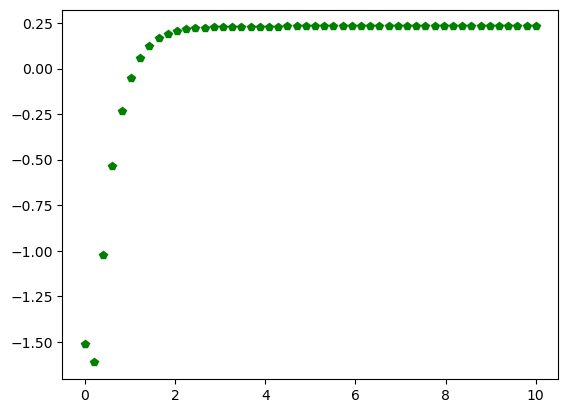

(array([0.972280244708789, 0.985239486426660, 0.908050594981204,
       0.839622664474962, 0.793721645623138, 0.764915982055594,
       0.747106861823907, 0.736104836544487, 0.729290635368836,
       0.725058655210075, 0.722424746527884, 0.720782985058942,
       0.719758619501847, 0.719119057046455, 0.718719579734758,
       0.718469996069049, 0.718314036276115, 0.718216569931839,
       0.718155654789298, 0.718117582083515, 0.718093785565299,
       0.718078911828299, 0.718069615078167, 0.718063804157339,
       0.718060172034982, 0.718057901767373, 0.718056482728461,
       0.718055595752244, 0.718055041343711, 0.718054694807996,
       0.718054478204133, 0.718054342814797, 0.718054258189002,
       0.718054205293215, 0.718054172230430, 0.718054151564366,
       0.718054138646935, 0.718054130572828, 0.718054125526066,
       0.718054122371561, 0.718054120399821, 0.718054119167375,
       0.718054118397028, 0.718054117915519, 0.718054117614549,
       0.718054117426426, 0.71805411730

In [32]:
n=np.linspace(0,10)
y=hop(pow(10,(-1)*n),0.5)[1]
pyplot.plot(n,y,'gp')
pyplot.show()
print(hop(pow(10,(-1)*n),0.5))

**3.10** We will see how to implement the gradient of a scalar function using Python lists:

(a) Write a Python function to compute the gradient $\nabla \phi(x)$ via a forward-difference approximation, as per Eq. (5.108). This should work for any scalar function; test it on the $\phi(x)$ of Eq. (5.106).

(b) Use your new function to plot $\cfrac{\partial \phi}{\partial x} \cfrac{\partial \phi}{\partial y}$ in a format similar to that in Fig. 5.16.

[1.441 0.1  ]


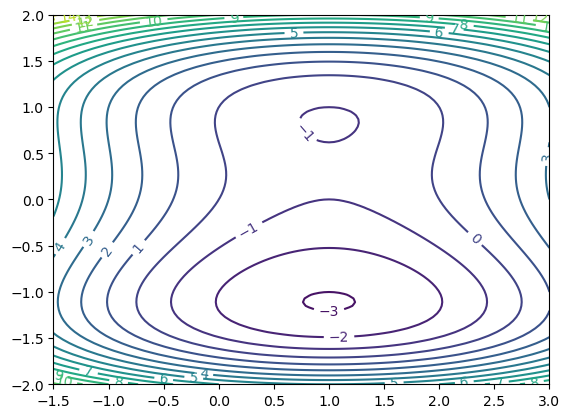

In [4]:
def funcion(x,x1):
    funlist=[x1**4-2*x1**2+x1,x**2-2*x]
    return funlist

    
def grad(lista,listaevh,h):
    n=len(lista)
    grad=np.zeros(n) 
    for i in range(n):
        grad[i]=(listaevh[i]-lista[i])/h
    return grad
h=0.1
gradiente=grad(funcion(1,1),funcion(1+h,1+h),h)
print(gradiente)



# Datos
x, x1= np.meshgrid(np.linspace(-1.5, 3, 100),
                   np.linspace(-2, 2, 100))
Z =x1**4-2*x1**2+x1+x**2-2*x

# Contour
fig, ax = plt.subplots()
cnt = ax.contour(x, x1, Z,20)
ax.clabel(cnt, cnt.levels, inline = True, fontsize = 10)

plt.show()
#h=0.1
#g=grad(funcion(x,x1),funcion(x+h,x1+h),h)
#pyplot.plot(g)
#pyplot.show()



**3.13** Produce a table of $x_i$ and $e^{sin(2x_i)}$ values, where $x_i$ goes from $0$ to $1.6$ in steps of $0.08$.

(a) Plot the forward-difference and central-difference results (for the first derivative) given these values. (Hint: if you cannot produce a result for a specific x, don’t.) Then, introduce a curve for the analytical derivative.

(b) Use Richardson extrapolation for the forward difference for points on a grid and add an extra set of points to the plot. You can use:

$R_{fd} = 2D_{fd}(h) − D_{fd}(2h) + O(h^2) $

[0.0, 0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72, 0.8, 0.88, 0.96, 1.04, 1.12, 1.2, 1.28, 1.36, 1.44, 1.52, 1.6]
0.0 2.01999797864143 1.9999999986666905
0.08 2.334506339308118 2.3154452659817526
0.16 2.61615139844924 2.6002248490009983
0.24 2.8251457104183197 2.8150603274770036
0.32 2.916097933625017 2.914736841994392
0.4 2.8451009289658824 2.854989256750917
0.48 2.5794617791667473 2.602113790516203
0.56 2.107984401171503 2.1433016767619772
0.64 1.4486286070466647 1.4945631951114535
0.72 0.6503214939016733 0.7029797044393327
0.8 -0.2129008344896377 -0.15866681531480076
0.88 -1.054700330927849 -1.0043410261324048
0.96 -1.7928370332623622 -1.751064511905387
1.04 -2.364359682166439 -2.3343234245477795
1.12 -2.735276978090395 -2.7181755772215155
1.2 -2.902572353016586 -2.8977531707880866
1.28 -2.889177804089482 -2.894613044820682
1.36 -2.7345973520594313 -2.7475328216605144
1.44 -2.4845496422916113 -2.502123129515721
1.52 -2.182359485606744 -2.2020538405622014
1.6 -1.8634971376218

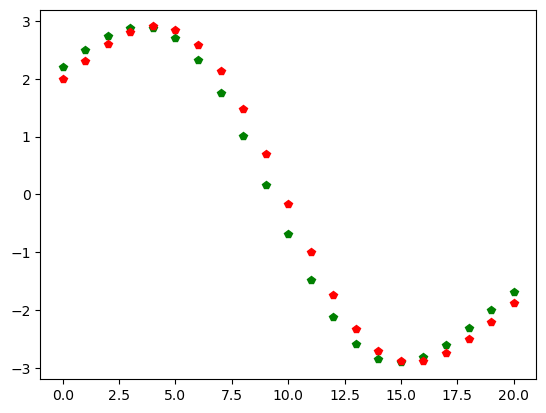

In [68]:
num1=[0.08*i for i in range(0,21)]
n=21
print (num1)
h=0.01
funf=np.zeros(n)
func=np.zeros(n)
for i in range(n):
    funf=(f(i*0.08+h)-f(i*0.08))/h
    func=(f(i*0.08+h/2)-f(i*0.08-h/2))/h
    print (i*0.08,funf,func)

def funfor(x,h):
    return (f(x*0.08+h)-f(x*0.08))/h
def funcen(x,h):
    return (f(x*0.08+h/2)-f(x*0.08-h/2))/h

pyplot.plot([funfor(x,0.1) for x in range(0,21)],'gp',[funcen(x,0.1) for x in range(0,21)],'rp')
pyplot.show()


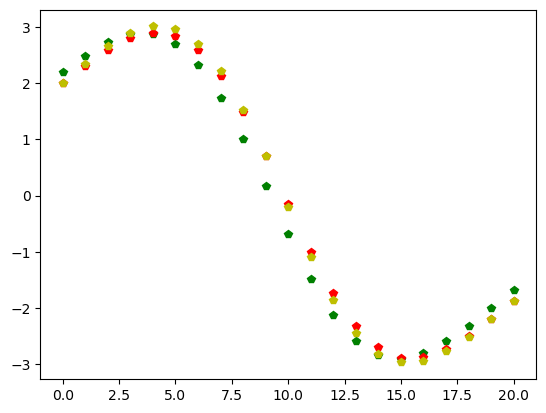

In [67]:
def richardson(x,h):
    return 2*funfor(x,h)-funfor(x,2*h)
pyplot.plot([funfor(x,0.1) for x in range(0,21)],'gp',[funcen(x,0.1) for x in range(0,21)],'rp',[richardson(x,0.1) for x in range(0,21)],'yp')
pyplot.show()

**3.16** We will now discuss an application of Richardson extrapolation which does not involve finite differences. Inspired by Archimedes’ approach to approximating the value of $\pi$ (namely inscribing a regular polygon in a circle with unit diameter), we write down the perimeter of a polygon with $2^n$ angles $g_n=2^n sen (\cfrac{\pi}{2^n})$ .

(a) Set $h = 2^{-n}$ and then Taylor/Maclaurin expand the sine so as to produce a sys- tematic theory for the dependence of $g$ on $h$, i.e., $g(h)$.